In [1]:
%matplotlib inline 
import numpy as np 
import matplotlib.pylab as plt 
import pandas as pd 
import seaborn as sns 
sns.set_style('ticks');
current_colors = sns.color_palette()
from scipy.optimize import minimize
from scipy.optimize import brentq

In [2]:
def find_mut_pos(mutation):
    mut_list = mutation.split(':')
    return np.array(map(lambda x: 20-int(x[:-1]), mut_list))

def extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color):
    data = Boyle_data.copy()
    data= data[data['seq'].apply(lambda x: x[-2:]=='GG')]
    data = data[data['nmut']>0]
    data.drop(['p5', 'p95', 'seq', 'series', 'count', 'se', 'nmut'], axis=1, inplace=True)
    data['MM_pos'] = data['mutations'].apply(find_mut_pos)
    data['MM_pos'] = data['MM_pos'].apply(lambda x: list(x[x>0]))
    data['nmut'] = data['MM_pos'].apply(len)        
    data = data[(data['nmut']>=nmut_min)&(data['nmut']<=nmut_max)]
    data['1st_MM_pos'] = data['MM_pos'].apply(lambda x: x[-1])
    data['MM_dist'] = data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))
    if consecuitive:
        data = data[data['MM_dist'].apply(lambda x: np.all(x==1))]
    data.drop(['MM_pos','mutations','nmut','MM_dist'], axis=1, inplace=True)
    data.sort_values(by='1st_MM_pos',inplace=True)
    data.reset_index(inplace=True,drop=True)
    data = data[['1st_MM_pos', col_name]]
    data_med = data.groupby('1st_MM_pos').median()
    data_med.reset_index(inplace=True)

    plt.plot(data['1st_MM_pos'], data[col_name], 'o', color=color)
    plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
    plt.xlabel('1st mismatch position', fontsize=15)
    plt.ylabel(col_name, fontsize=15)
    plt.xticks(range(1,21),fontsize=15);
    plt.yticks(fontsize=15);
    title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
    if consecuitive:
        title = title + '   consecuitive'
    plt.title(title, fontsize=15)
    
    return data_med, data


## On rate

In [3]:
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data['slope'] = 1000*on_data['slope']
on_data['se'] = 1000*on_data['se']
on_data.rename(columns={'slope': 'Apparent on-rate ($10^{-3}$Hz)'}, inplace=True)

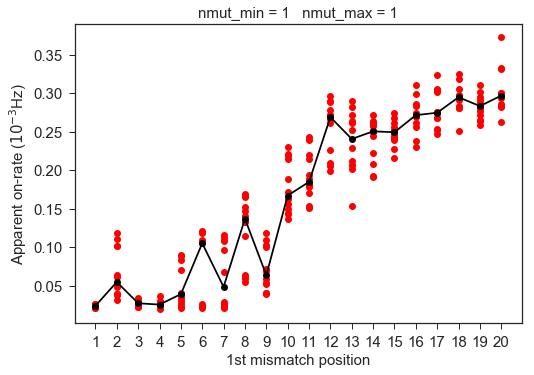

In [4]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 1
nmut_max = 1
consecuitive = False
color = 'r'
on_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

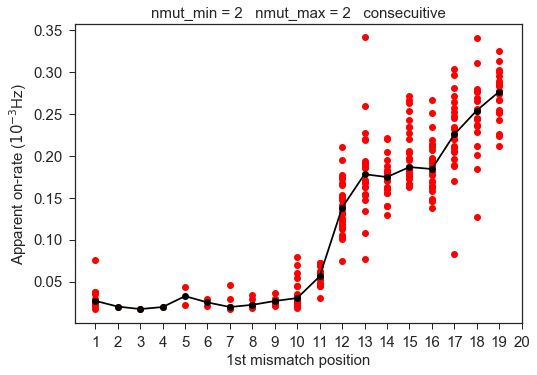

In [5]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = True
color = 'r'
on_data_med_2MM_consecuitive,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

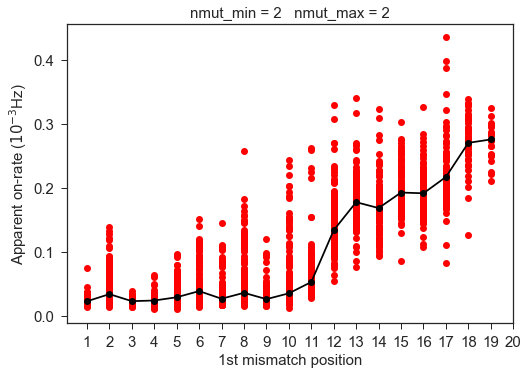

In [6]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = False
color = 'r'
on_data_med_2MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

(0, 0.4)

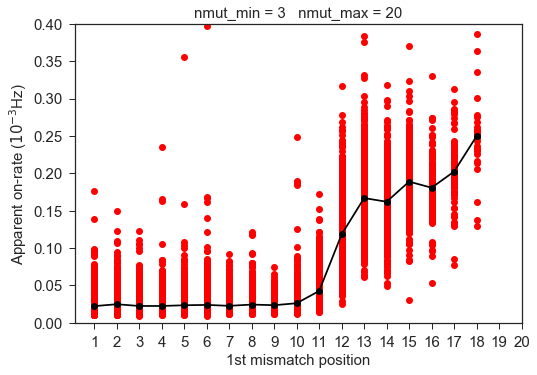

In [7]:
Boyle_data = on_data
col_name = 'Apparent on-rate ($10^{-3}$Hz)'
nmut_min = 3
nmut_max = 20
consecuitive = False
color = 'r'
on_data_med_multiMM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([0,0.4])

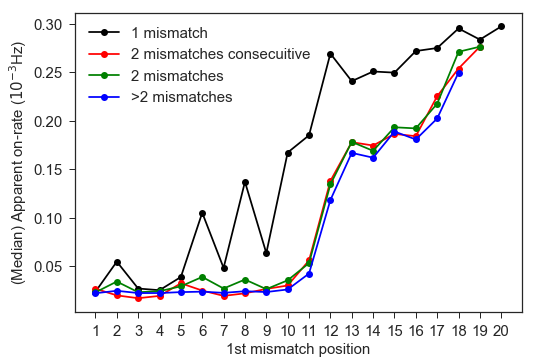

In [8]:
plt.plot(on_data_med_1MM['1st_MM_pos'], on_data_med_1MM[col_name], 'o-',color='k', label='1 mismatch')
plt.plot(on_data_med_2MM_consecuitive['1st_MM_pos'], on_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(on_data_med_2MM['1st_MM_pos'], on_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(on_data_med_multiMM['1st_MM_pos'], on_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent on-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)

## Off rate

In [9]:
off_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.off.10nM.rep1.txt',delimiter='\t')
off_data['slope'] = -1000*off_data['slope']
off_data['se'] = 1000*off_data['se']
off_data.rename(columns={'slope': 'Apparent off-rate ($10^{-3}$Hz)'}, inplace=True)

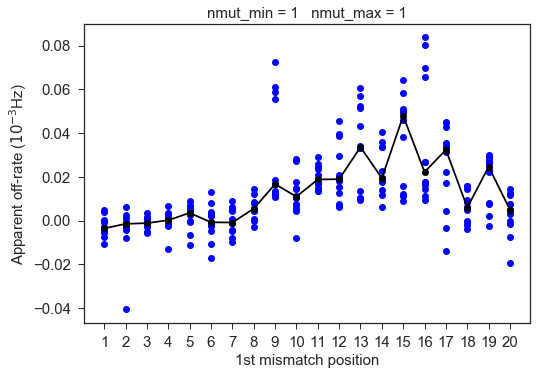

In [10]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 1
nmut_max = 1
consecuitive = False
color = 'b'
off_data_med_1MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

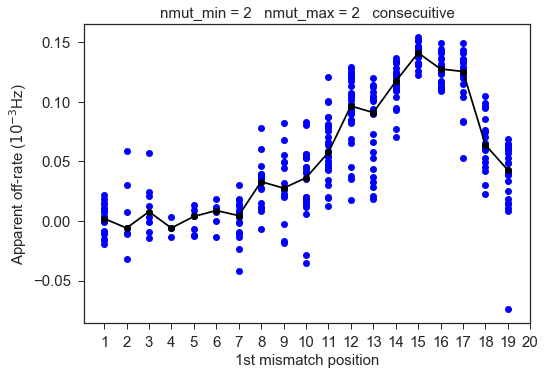

In [11]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = True
color = 'b'
off_data_med_2MM_consecuitive,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)

(-0.05, 0.2)

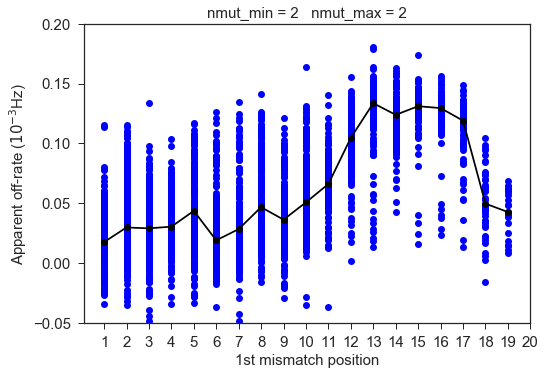

In [12]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 2
nmut_max = 2
consecuitive = False
color = 'b'
off_data_med_2MM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([-0.05,0.2])

(-0.05, 0.2)

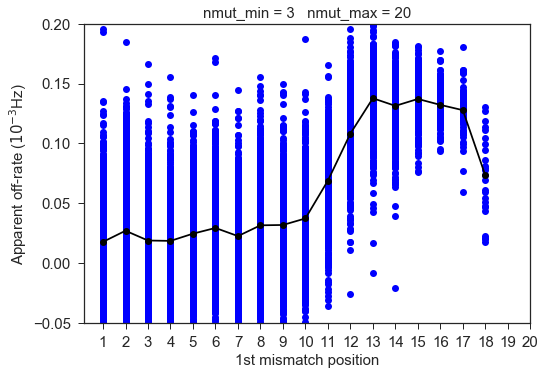

In [13]:
Boyle_data = off_data
col_name = 'Apparent off-rate ($10^{-3}$Hz)'
nmut_min = 3
nmut_max = 20
consecuitive = False
color = 'b'
off_data_med_multiMM,_ = extract_data(Boyle_data, col_name, nmut_min, nmut_max, consecuitive, color)
plt.ylim([-0.05,0.2])

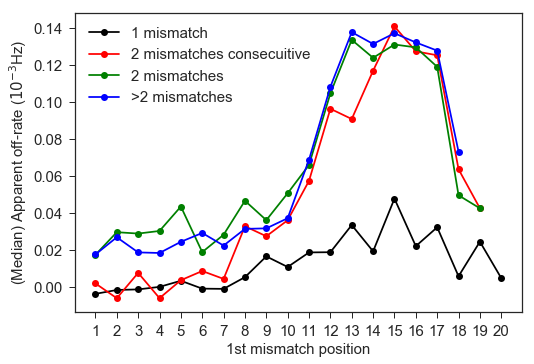

In [14]:
plt.plot(off_data_med_1MM['1st_MM_pos'], off_data_med_1MM[col_name], 'o-',color='k', label='1 mismatch')
plt.plot(off_data_med_2MM_consecuitive['1st_MM_pos'], off_data_med_2MM_consecuitive[col_name], 'o-',color='r', label='2 mismatches consecuitive')
plt.plot(off_data_med_2MM['1st_MM_pos'], off_data_med_2MM[col_name], 'o-',color='g', label='2 mismatches')
plt.plot(off_data_med_multiMM['1st_MM_pos'], off_data_med_multiMM[col_name], 'o-',color='b', label='>2 mismatches')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent off-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)

## Occupancy 

In [15]:
occ_data = pd.read_csv('../Data_Boyle/occupancy_rep1_processed_with_errors.txt',delimiter=',')
occ_data.rename(columns={'Ratio': 'Relative occupancy'}, inplace=True)
occ_data = occ_data[occ_data['nmut']>0]
occ_data['MM_pos'] = occ_data['mutations'].apply(find_mut_pos)
occ_data = occ_data[occ_data['MM_pos'].apply(lambda x: np.all(np.array(x)>=0))]
occ_data['MM_pos'] = occ_data['MM_pos'].apply(lambda x: filter(lambda y: y>0, x))
occ_data.drop(['Unnamed: 0', 'mutations', 'nmut', 'delta Intensity', 'se', 'rel_err', 'rel_err_Ratio'],
             inplace=True, axis=1)
occ_data['nmut'] = occ_data['MM_pos'].apply(lambda x: len(x))
occ_data = occ_data[occ_data['nmut']>0]
occ_data['1st_MM_pos'] = occ_data['MM_pos'].apply(lambda x: x[-1])
occ_data['MM_dist'] = occ_data['MM_pos'].apply(lambda x: np.abs(np.diff(np.array(x))))

occ_data_1MM = occ_data[occ_data['nmut']==1][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                        drop=True)
occ_data_2MM = occ_data[occ_data['nmut']==2][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                         drop=True)
occ_data_2MM_consecuitive = occ_data[(occ_data['nmut']==2)&(occ_data['MM_dist'].apply(lambda x: np.all(x==1)))][['1st_MM_pos', 'Relative occupancy']].sort_values(by='1st_MM_pos',
                                                                                              inplace=False).reset_index(inplace=False, 
                                                                                                                         drop=True)
occ_data_1MM_med = occ_data_1MM.groupby('1st_MM_pos').median().reset_index()
occ_data_2MM_med = occ_data_2MM.groupby('1st_MM_pos').median().reset_index()
occ_data_2MM_consecuitive_med = occ_data_2MM_consecuitive.groupby('1st_MM_pos').median().reset_index()

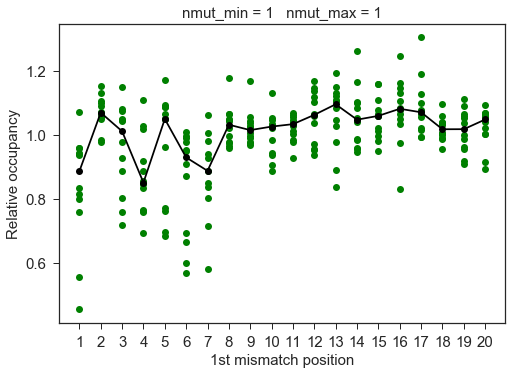

In [16]:
data=occ_data_1MM
data_med = occ_data_1MM_med
consecuitive = False
col_name = 'Relative occupancy'
nmut_min = 1
nmut_max = 1

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

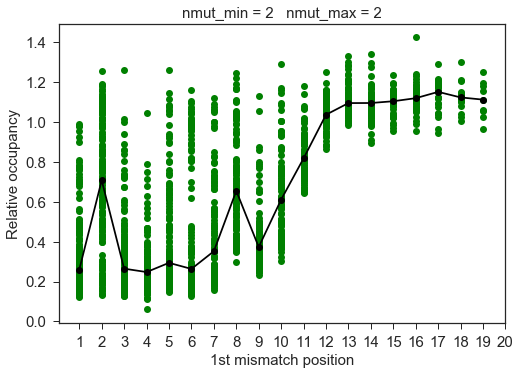

In [17]:
data=occ_data_2MM
data_med = occ_data_2MM_med
consecuitive = False
col_name = 'Relative occupancy'
nmut_min = 2
nmut_max = 2

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

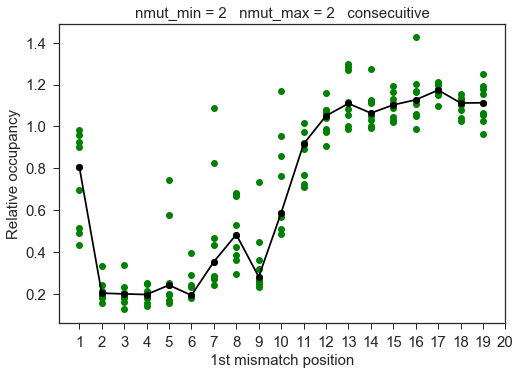

In [18]:
data=occ_data_2MM_consecuitive
data_med = occ_data_2MM_consecuitive_med
consecuitive = True
col_name = 'Relative occupancy'
nmut_min = 2
nmut_max = 2

plt.plot(data['1st_MM_pos'], data[col_name], 'o', color='g')
plt.plot(data_med['1st_MM_pos'], data_med[col_name], 'o-',color='k')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel(col_name, fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
title = 'nmut_min = '+str(nmut_min)+'   '+'nmut_max = '+str(nmut_max)
if consecuitive:
    title = title + '   consecuitive'
plt.title(title, fontsize=15)

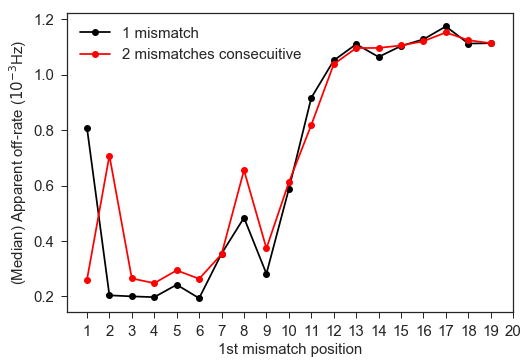

In [19]:
plt.plot(occ_data_2MM_consecuitive_med['1st_MM_pos'], occ_data_2MM_consecuitive_med['Relative occupancy'], 'o-',color='k', label='1 mismatch')
plt.plot(occ_data_2MM_med['1st_MM_pos'], occ_data_2MM_med['Relative occupancy'], 'o-',color='r', label='2 mismatches consecuitive')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('(Median) Apparent off-rate ($10^{-3}$Hz)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)

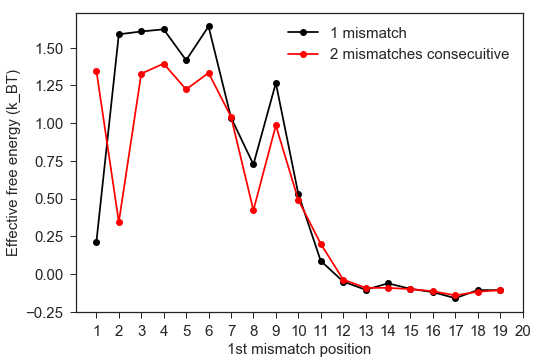

In [20]:
plt.plot(occ_data_2MM_consecuitive_med['1st_MM_pos'], -np.log(occ_data_2MM_consecuitive_med['Relative occupancy']), 'o-',color='k', label='1 mismatch')
plt.plot(occ_data_2MM_med['1st_MM_pos'], -np.log(occ_data_2MM_med['Relative occupancy']), 'o-',color='r', label='2 mismatches consecuitive')
plt.xlabel('1st mismatch position', fontsize=15)
plt.ylabel('Effective free energy (k_BT)', fontsize=15)
plt.xticks(range(1,21),fontsize=15);
plt.yticks(fontsize=15);
plt.legend(loc='best', fontsize=15)

## Double-Mismatch on-rate

In [ ]:
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data = pd.read_csv('../Data_Boyle/second_fit_data.summarized.on.1nM.rep1.txt',delimiter='\t')
on_data_2MM = exctract_2MM_data(on_data, 'App_on_rate ($10^{-3}$Hz)')

In [ ]:
plt.figure(1)
plt.errorbar(on_data_2MM['1st_MM_pos'],
             on_data_2MM['App_on_rate ($10^{-3}$Hz)'], 
             yerr=on_data_2MM['se'], 
             marker='o', color='r', label = 'double mismatch on-rate (1 nM)')
plt.xlabel('1st mismatch poition', fontsize=15)
plt.ylabel('apparent on-rate ($10^{-3}$Hz)', fontsize=15)
plt.legend(fontsize=15, loc='best')
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

In [ ]:
App_kon_WT = on_data[on_data['nmut']==0]['App_on_rate ($10^{-3}$Hz)'].iloc[0]
k_opt = minimize(lambda x: -1*calc_app_rate(x),x0=1).x[0]
kon_WT = brentq(lambda x: App_kon_WT-calc_app_rate(x),a=0, b=k_opt)

In [ ]:
offrate_array = list(np.arange(0,10,0.001))
App_onrate_array = map(lambda x: two_state_model(koff=x,kon=kon_WT), offrate_array)
App_offrate_array = map(calc_app_rate, offrate_array)
plt.figure(2)
plt.plot(offrate_array, App_onrate_array, 'r', lw=2, label='apparent on-rate')
plt.plot(offrate_array, App_offrate_array, 'g', lw=2, label='apparent off-rate')

In [ ]:
on_data_2MM

In [ ]:
calc_app_rate(kon_WT)

In [ ]:
App_kon_WT

In [ ]:
calc_app_rate(0.2)

In [ ]:
on_data_2MM